In [1]:
import os
import json
import math
import random
import itertools
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download 'edwardotieno/2019-crimes-data'

2019-crimes-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
! unzip 2019-crimes-data.zip

Archive:  2019-crimes-data.zip
replace crimes.dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: crimes.dataset.csv      
replace crimes.dataset.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: crimes.dataset.xlsx     


In [7]:
df_raw = pd.read_csv("crimes.dataset.csv")

In [8]:
df_raw

,Year,Population,Violent Crimes,Violent crime rate,Murder nonnegligent manslaughter,Murder nonnegligent manslaughter rate,Rape\n(revised\ndefinition),Rape\n(revised\ndefinition)\nrate,Rape\n(legacy\ndefinition,Rape\n(legacy\ndefinition)\nrate,...,Aggravated\nassault,Aggravated\nassault rate,Property\ncrime,Property\ncrime\nrate,Burglary,Burglary\nrate,Larceny-\ntheft,Larceny-\ntheft rate,Motor\nvehicle\ntheft,Motor\nvehicle\ntheft\nrate
0,2000,"281,421,906","1,425,486",506.5,"15,586",5.5,NaN,NaN,"90,178",32.0,...,"911,706",324.0,"10,182,584","3,618.3","2,050,992",728.8,"6,971,590","2,477.3","1,160,002",412.2
1,2001,"285,317,559","1,439,480",504.5,"16,037",5.6,NaN,NaN,"90,863",31.8,...,"909,023",318.6,"10,437,189","3,658.1","2,116,531",741.8,"7,092,267","2,485.7","1,228,391",430.5
2,2002,"287,973,924","1,423,677",494.4,"16,229",5.6,NaN,NaN,"95,235",33.1,...,"891,407",309.5,"10,455,277","3,630.6","2,151,252",747.0,"7,057,379","2,450.7","1,246,646",432.9
3,2003,"290,788,976","1,383,676",475.8,"16,528",5.7,NaN,NaN,"93,883",32.3,...,"859,030",295.4,"10,442,862","3,591.2","2,154,834",741.0,"7,026,802","2,416.5","1,261,226",433.7
4,2004,"293,656,842","1,360,088",463.2,"16,148",5.5,NaN,NaN,"95,089",32.4,...,"847,381",288.6,"10,319,386","3,514.1","2,144,446",730.3,"6,937,089","2,362.3","1,237,851",421.5
5,2005,"296,507,061","1,390,745",469.0,"16,740",5.6,NaN,NaN,"94,347",31.8,...,"862,220",290.8,"10,174,754","3,431.5","2,155,448",726.9,"6,783,447","2,287.8","1,235,859",416.8
6,2006,"299,398,484","1,435,123",479.3,"17,309",5.8,NaN,NaN,"94,472",31.6,...,"874,096",292.0,"10,019,601","3,346.6","2,194,993",733.1,"6,626,363","2,213.2","1,198,245",400.2
7,2007,"301,621,157","1,422,970",471.8,"17,128",5.7,NaN,NaN,"92,160",30.6,...,"866,358",287.2,"9,882,212","3,276.4","2,190,198",726.1,"6,591,542","2,185.4","1,100,472",364.9
8,2008,"304,059,724","1,394,461",458.6,"16,465",5.4,NaN,NaN,"90,750",29.8,...,"843,683",277.5,"9,774,152","3,214.6","2,228,887",733.0,"6,586,206","2,166.1","959,059",315.4
9,2009,"307,006,550","1,325,896",431.9,"15,399",5.0,NaN,NaN,"89,241",29.1,...,"812,514",264.7,"9,337,060","3,041.3","2,203,313",717.7,"6,338,095","2,064.5","795,652",259.2


## 8. Preprocessing

#### A. Data Cleaning

In [9]:
df_raw.columns = df_raw.columns.str.replace('\n', ' ')

In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   20 non-null     int64  
 1   Population                             20 non-null     object 
 2   Violent Crimes                         20 non-null     object 
 3   Violent crime rate                     20 non-null     float64
 4   Murder nonnegligent manslaughter       20 non-null     object 
 5   Murder nonnegligent manslaughter rate  20 non-null     float64
 6   Rape (revised definition)              7 non-null      object 
 7   Rape (revised definition) rate         7 non-null      float64
 8   Rape (legacy definition                20 non-null     object 
 9   Rape (legacy definition) rate          20 non-null     float64
 10  Robbery                                20 non-null     object 
 11  Robbery 

#### B. Type Conversion

In [11]:
object_cols = df_raw.select_dtypes(include='object').columns.tolist()

In [12]:
for column in object_cols:
    df_raw[column] = pd.to_numeric(df_raw[column].str.replace(',', ''), errors='coerce')

In [13]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   20 non-null     int64  
 1   Population                             20 non-null     int64  
 2   Violent Crimes                         20 non-null     int64  
 3   Violent crime rate                     20 non-null     float64
 4   Murder nonnegligent manslaughter       20 non-null     int64  
 5   Murder nonnegligent manslaughter rate  20 non-null     float64
 6   Rape (revised definition)              7 non-null      float64
 7   Rape (revised definition) rate         7 non-null      float64
 8   Rape (legacy definition                20 non-null     int64  
 9   Rape (legacy definition) rate          20 non-null     float64
 10  Robbery                                20 non-null     int64  
 11  Robbery 

In [14]:
df_raw.head()

,Year,Population,Violent Crimes,Violent crime rate,Murder nonnegligent manslaughter,Murder nonnegligent manslaughter rate,Rape (revised definition),Rape (revised definition) rate,Rape (legacy definition,Rape (legacy definition) rate,...,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate
0,2000,281421906,1425486,506.5,15586,5.5,NaN,NaN,90178,32.0,...,911706,324.0,10182584,3618.3,2050992,728.8,6971590,2477.3,1160002,412.2
1,2001,285317559,1439480,504.5,16037,5.6,NaN,NaN,90863,31.8,...,909023,318.6,10437189,3658.1,2116531,741.8,7092267,2485.7,1228391,430.5
2,2002,287973924,1423677,494.4,16229,5.6,NaN,NaN,95235,33.1,...,891407,309.5,10455277,3630.6,2151252,747.0,7057379,2450.7,1246646,432.9
3,2003,290788976,1383676,475.8,16528,5.7,NaN,NaN,93883,32.3,...,859030,295.4,10442862,3591.2,2154834,741.0,7026802,2416.5,1261226,433.7
4,2004,293656842,1360088,463.2,16148,5.5,NaN,NaN,95089,32.4,...,847381,288.6,10319386,3514.1,2144446,730.3,6937089,2362.3,1237851,421.5


The columns were converted from object data types (due to the presence of commas) to numeric data types (integers or floats).
* The commas were removed using the `.replace()` function.
* The column values were converted using Pandas's `to_numeric()` function

**Benefits**

* Compatibility: It allows us to make data compatible with operations and functions that expect specific data types. For example, if we want to perform arithmetic operations on a numerical value, it must be in a numeric data type (int or float).

* Efficiency: Different data types have different memory requirements and representations. Using `pd.to_numeric()` allowed us to convert the data to the appropriate data type to help save memory and improve computational efficiency. Using integers instead of floating-point numbers for whole numbers can save memory

#### C. Missing Values

The columns has missing values from the year 2000 to 2012. This is because a revised definition of rape was introduced in 2013.

* Rape (revised definition):  Penetration, no matter how slight, of the vagina or anus with any body part or object, or oral penetration by a sex organ of another person, without the consent of the victim. (This includes the offenses of Rape, Sodomy, and Sexual Assault with an Object as converted from data submitted via the National Incident-Based Reporting System [NIBRS]).

* Rape (legacy definition):  The carnal knowledge of a female forcibly and against her will.

[Source](https://ucr.fbi.gov/crime-in-the-u.s/2014/preliminary-semiannual-uniform-crime-report-january-june-2014/tables/table-3/table-3/@@template-layout-view?override-view=data-declaration)

It's more reasonable to retain the column and perform separate analyses.

The dataset will be split into two.
* `df_before` will contain data from 2000 to 2012
* `df_after` will contain data from 2013 to 2019

We will drop the `Rape (revised definition)` column in `df_before` and drop the `Rape (legacy definition)` in `df_after`.

A third dataframe will be created which won't contain the revised definition of rape.

In [15]:
# Create df_before with data from 2000 to 2012
df_before = df_raw[df_raw['Year'] <= 2012].copy()
df_before.drop(columns=['Rape (revised definition)', 'Rape (revised definition) rate'], axis = 1, inplace=True)

# Create df_after with data from 2013 to 2019
df_after = df_raw[df_raw['Year'] >= 2013].copy()
df_after.drop(columns=['Rape (legacy definition', 'Rape (legacy definition) rate'], axis = 1, inplace=True)

df_new = df_raw.drop(columns=['Rape (revised definition)', 'Rape (revised definition) rate'], axis = 1)


In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   20 non-null     int64  
 1   Population                             20 non-null     int64  
 2   Violent Crimes                         20 non-null     int64  
 3   Violent crime rate                     20 non-null     float64
 4   Murder nonnegligent manslaughter       20 non-null     int64  
 5   Murder nonnegligent manslaughter rate  20 non-null     float64
 6   Rape (legacy definition                20 non-null     int64  
 7   Rape (legacy definition) rate          20 non-null     float64
 8   Robbery                                20 non-null     int64  
 9   Robbery rate                           20 non-null     float64
 10  Aggravated assault                     20 non-null     int64  
 11  Aggravat

In [17]:
df_before.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   13 non-null     int64  
 1   Population                             13 non-null     int64  
 2   Violent Crimes                         13 non-null     int64  
 3   Violent crime rate                     13 non-null     float64
 4   Murder nonnegligent manslaughter       13 non-null     int64  
 5   Murder nonnegligent manslaughter rate  13 non-null     float64
 6   Rape (legacy definition                13 non-null     int64  
 7   Rape (legacy definition) rate          13 non-null     float64
 8   Robbery                                13 non-null     int64  
 9   Robbery rate                           13 non-null     float64
 10  Aggravated assault                     13 non-null     int64  
 11  Aggravat

In [18]:
df_after.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 13 to 19
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   7 non-null      int64  
 1   Population                             7 non-null      int64  
 2   Violent Crimes                         7 non-null      int64  
 3   Violent crime rate                     7 non-null      float64
 4   Murder nonnegligent manslaughter       7 non-null      int64  
 5   Murder nonnegligent manslaughter rate  7 non-null      float64
 6   Rape (revised definition)              7 non-null      float64
 7   Rape (revised definition) rate         7 non-null      float64
 8   Robbery                                7 non-null      int64  
 9   Robbery rate                           7 non-null      float64
 10  Aggravated assault                     7 non-null      int64  
 11  Aggravat

**Benefits**

It is important to handle missing values as they can lead to inaccurate conclusions about the data, which can significantly impact the accuracy of the analysis.

* Performing separate analyses allows us to capture trends and patterns based on the available data.

* Retaining the revised definition column provides valuable information which is the standard used from 2013 onwards.

## 9. Exploratory Data Analysis

#### A. Trends
We'll study the crime rates instead of the crimes for the following reasons:

* Normalization: The crime rates are normalized to the population size, which makes it more suitable for making meaningful comparisons across different years or regions.

* Comparability: Absolute counts of "Violent Crimes" can be misleading when comparing data from different years or areas with significantly different population sizes.

<Figure size 1500x700 with 0 Axes>

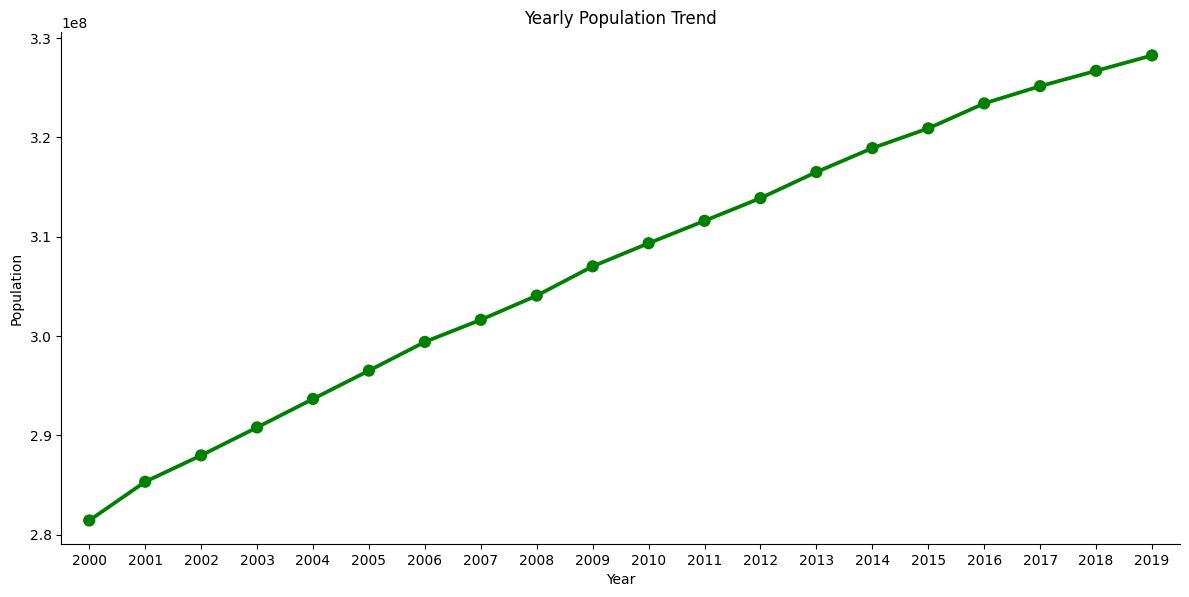

In [19]:
# Population trend
plt.figure(figsize=(15,7))
sns.catplot(data=df_new, x='Year', y='Population', kind='point', height=6, aspect=2, color='g')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Yearly Population Trend')
sns.despine()

<Figure size 1500x700 with 0 Axes>

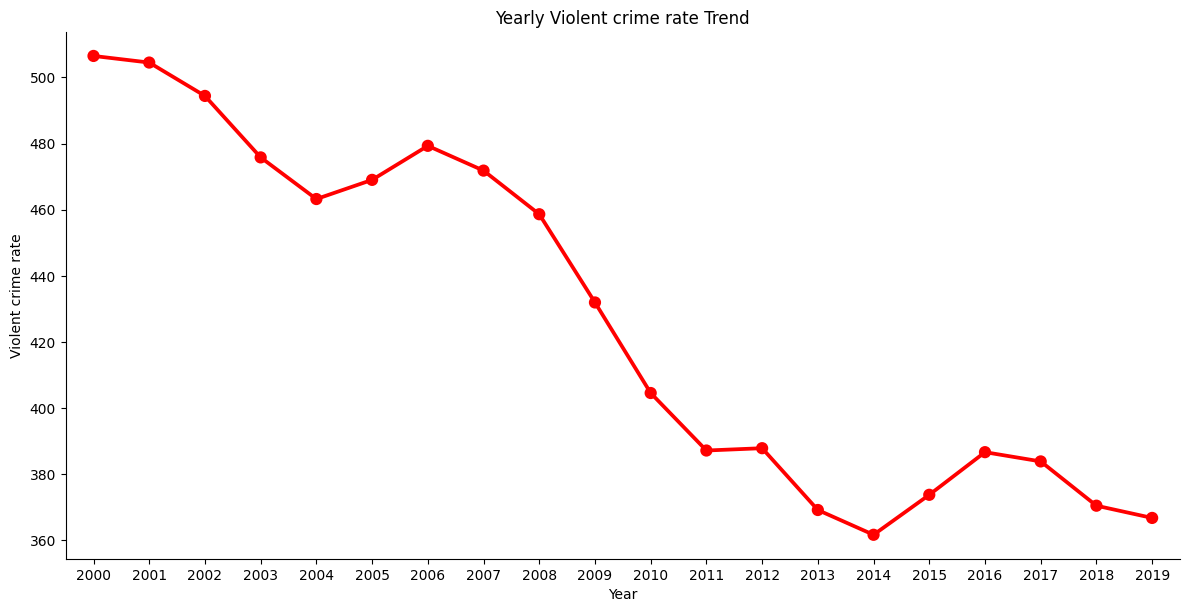

In [20]:
# Violent crime rate trend
plt.figure(figsize=(15,7))
sns.catplot(data=df_new, x='Year', y='Violent crime rate', kind='point', height=6, aspect=2, color='r')
plt.xlabel('Year')
plt.ylabel('Violent crime rate')
plt.title('Yearly Violent crime rate Trend')
sns.despine()

##### Other crime rates

In [21]:
columnsToShow = [
 'Murder nonnegligent manslaughter rate',
 'Rape (legacy definition) rate',
 'Robbery rate',
 'Aggravated assault rate',
 'Property crime rate',
 'Burglary rate',
 'Larceny- theft rate',
 'Motor vehicle theft rate']

<Figure size 1500x700 with 0 Axes>

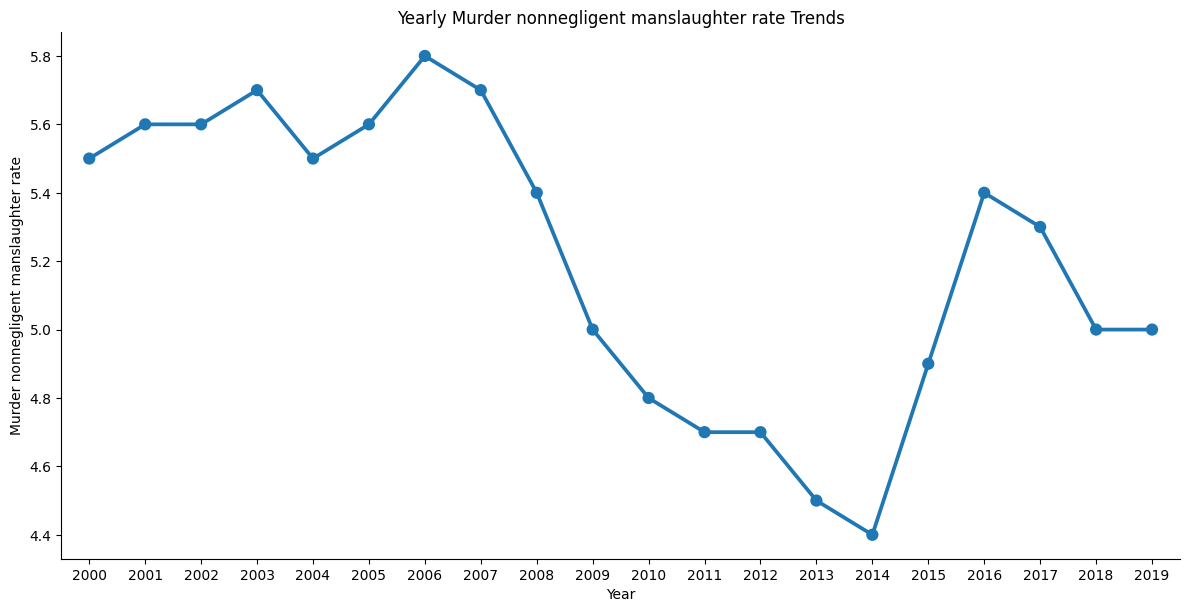

<Figure size 1500x700 with 0 Axes>

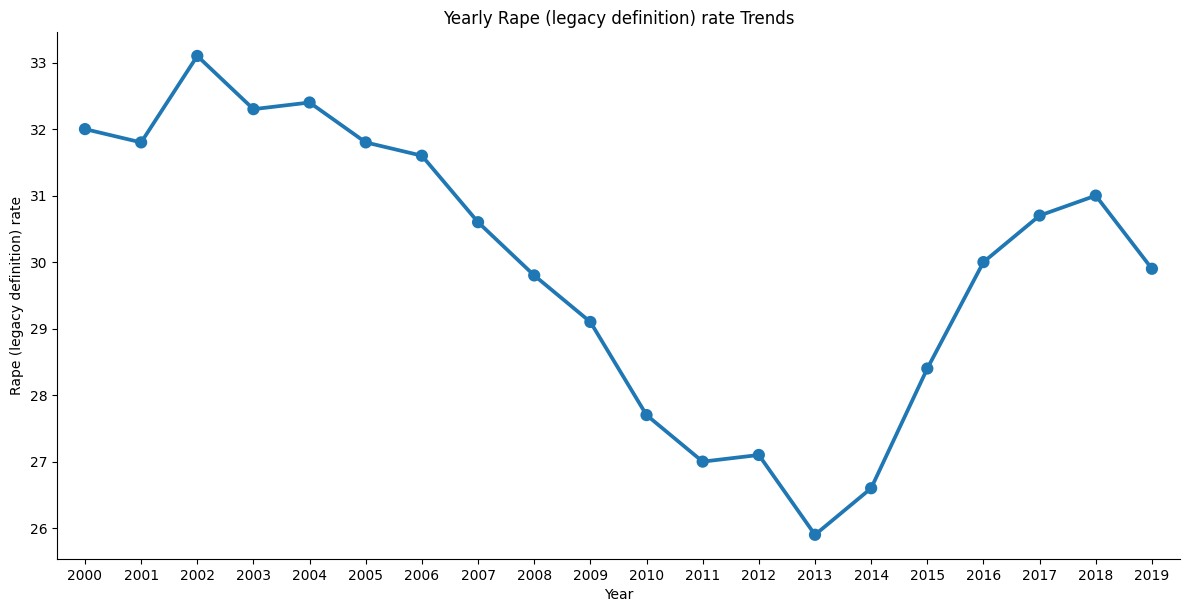

<Figure size 1500x700 with 0 Axes>

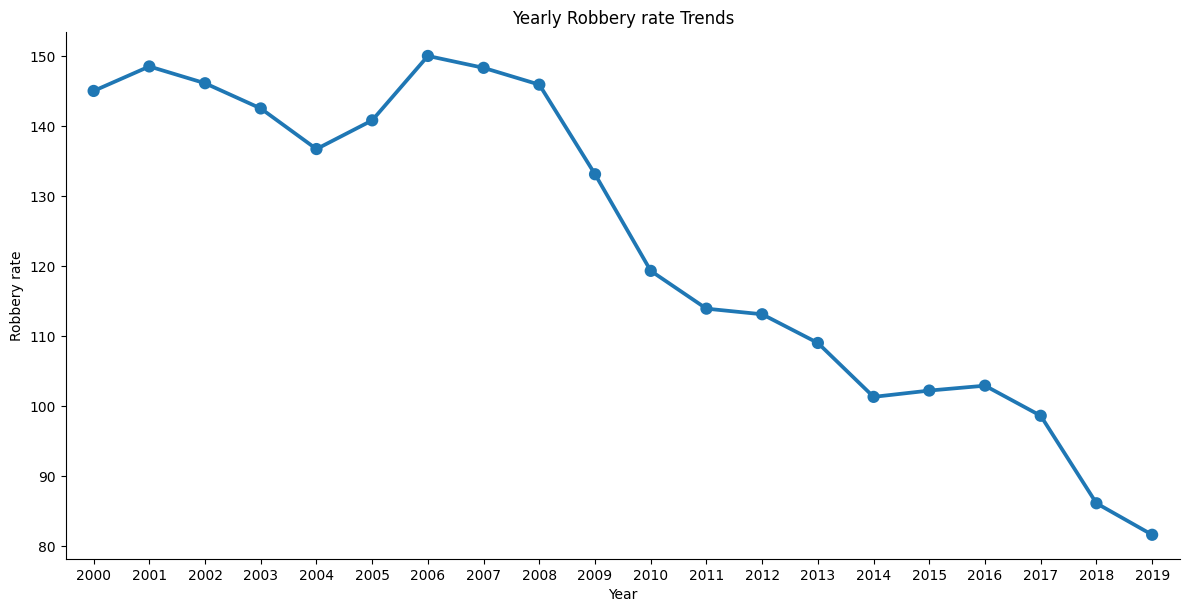

<Figure size 1500x700 with 0 Axes>

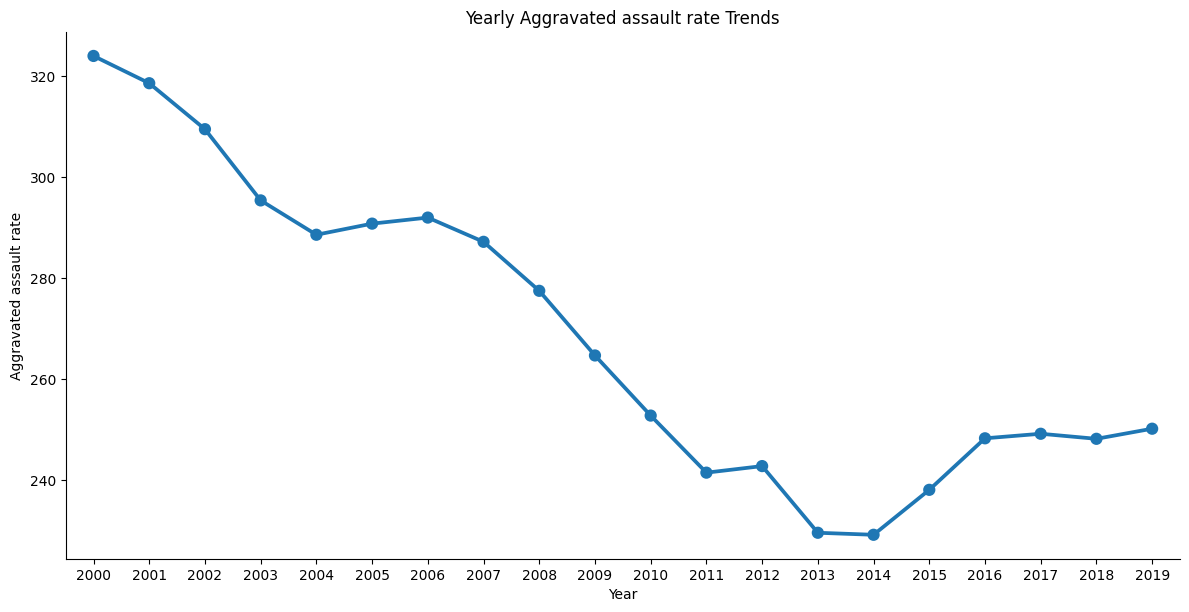

<Figure size 1500x700 with 0 Axes>

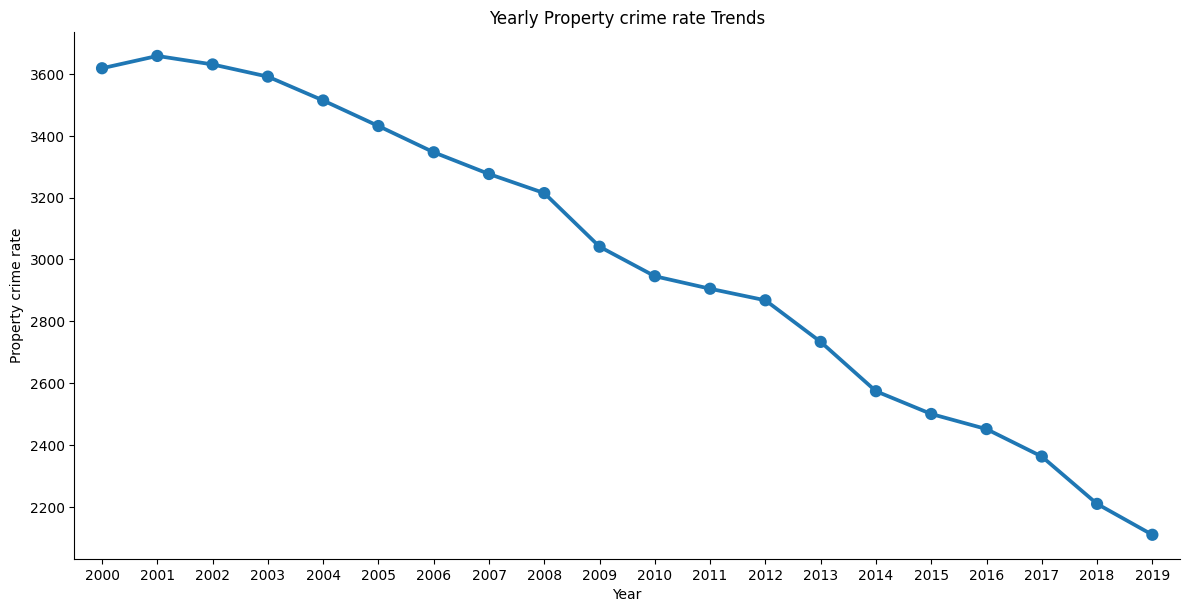

<Figure size 1500x700 with 0 Axes>

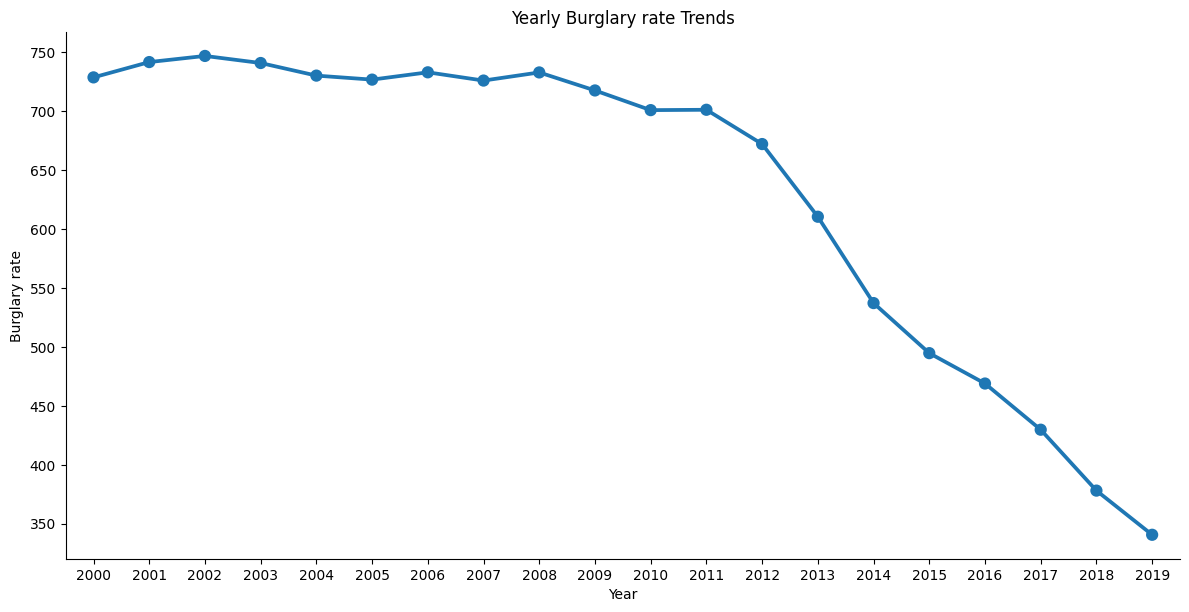

<Figure size 1500x700 with 0 Axes>

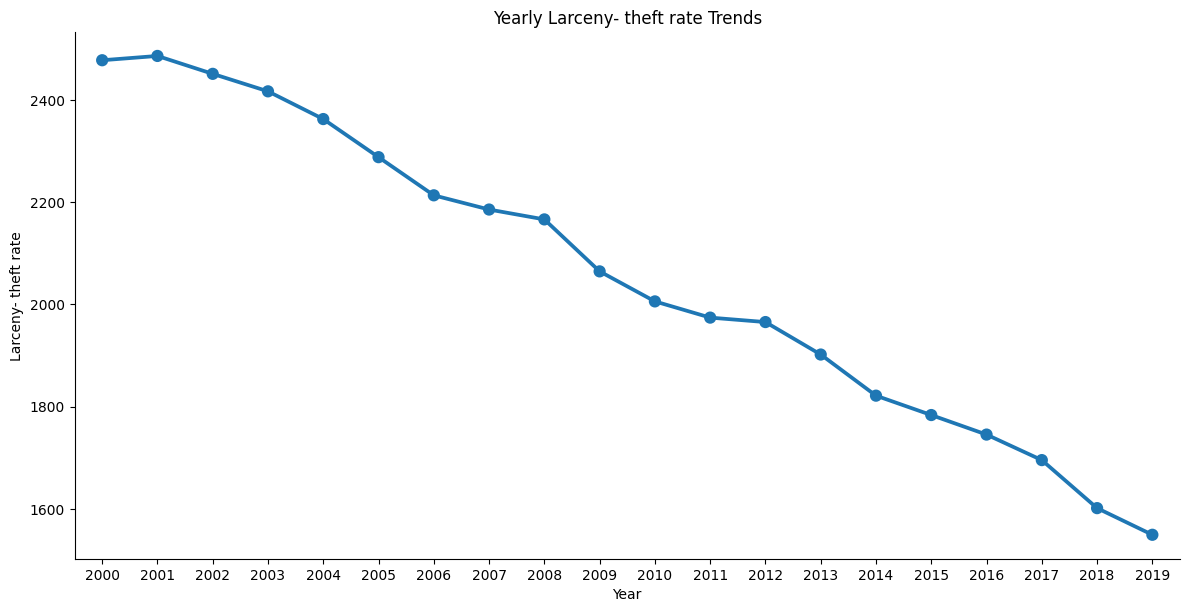

<Figure size 1500x700 with 0 Axes>

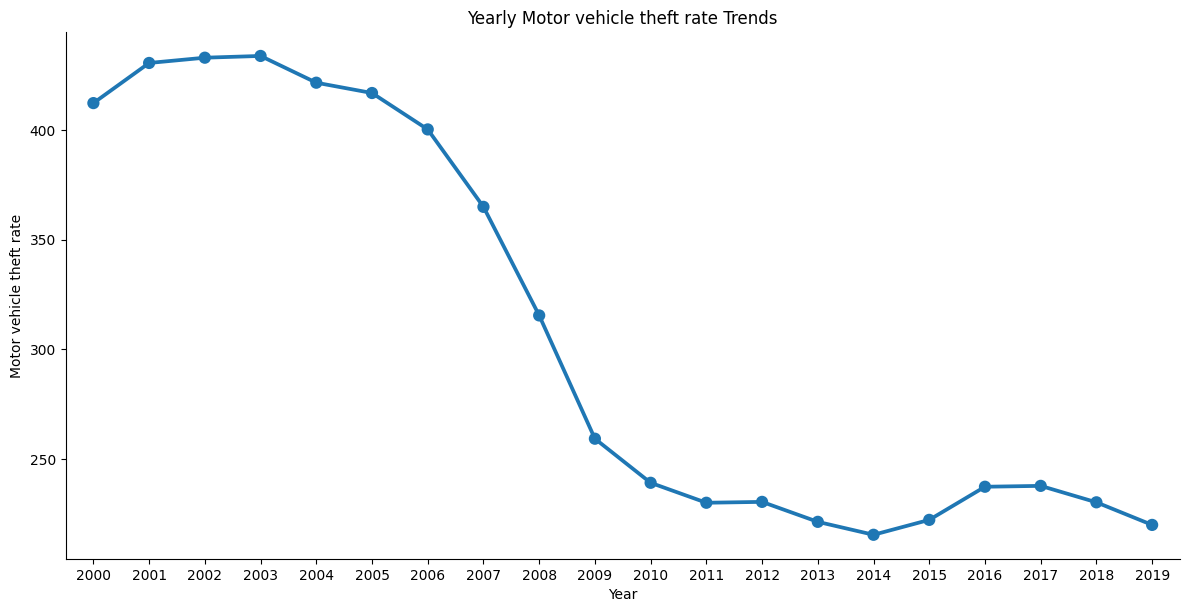

In [22]:
for column in columnsToShow:
    plt.figure(figsize=(15,7))
    sns.catplot(data=df_new, x='Year', y=column, kind='point', height=6, aspect=2)
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.title(f'Yearly {column} Trends')
    sns.despine()

Trend Plots (Line Charts):

* Trend plots are essential for businesses to understand how specific variables change over time. Using trend plots for variables like "Violent Crimes" or "Property Crime" over the years can help identify long-term patterns or trends. For instance, businesses can make decisions based on whether crime rates are increasing or decreasing in certain areas, which may impact investment or security strategies.

* Trend plots are also used to visualize historical data trends. Researchers can analyze how crime rates or other variables have evolved over time and may correlate with other factors.

#### B. Proportion of crimes from 2000 to 2019

In [23]:
crime_categories_before = [
 'Murder nonnegligent manslaughter',
 'Rape (legacy definition',
 'Robbery',
 'Aggravated assault',
 'Property crime',
 'Burglary',
 'Larceny- theft',
 'Motor vehicle theft'
 ]

crime_categories_after = [
 'Murder nonnegligent manslaughter',
 'Rape (revised definition)',
 'Robbery',
 'Aggravated assault',
 'Property crime',
 'Burglary',
 'Larceny- theft',
 'Motor vehicle theft'
 ]

##### **Proportion of crimes from 2000 to 2012**

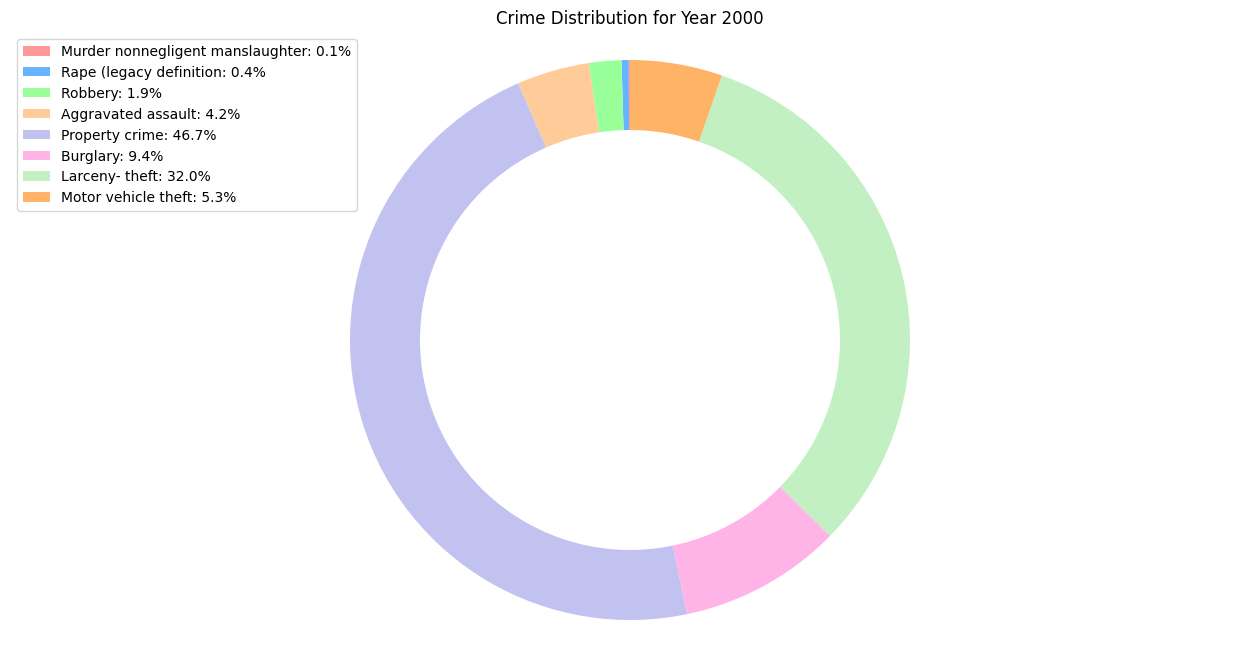

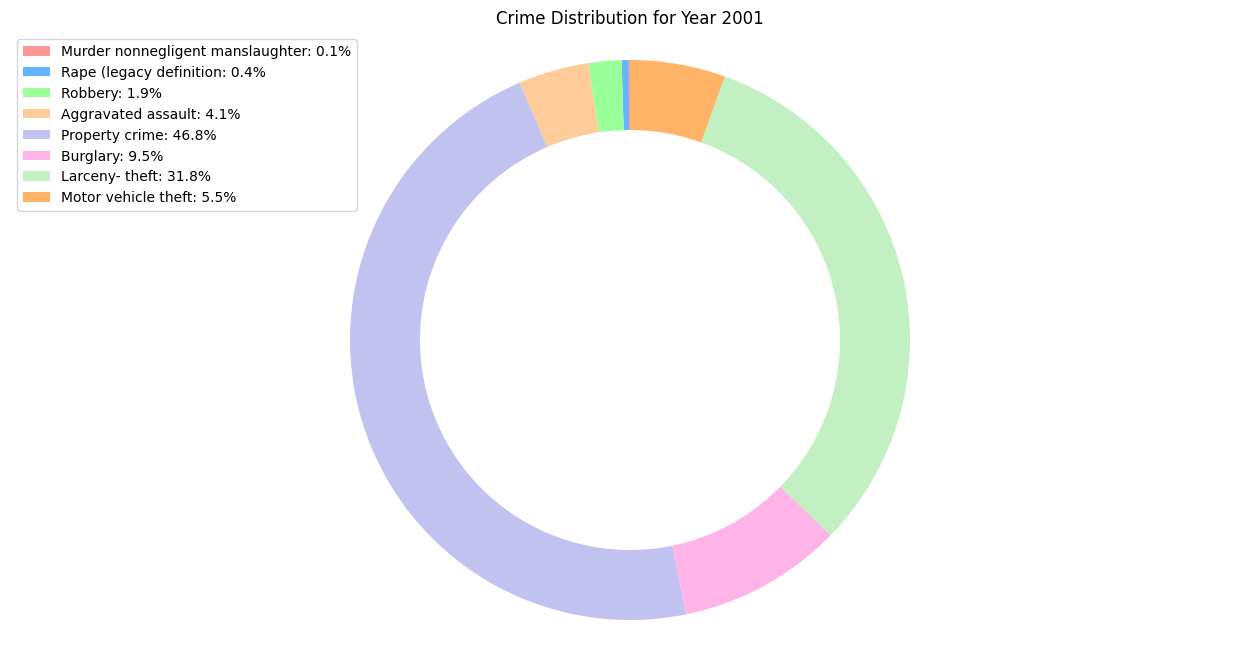

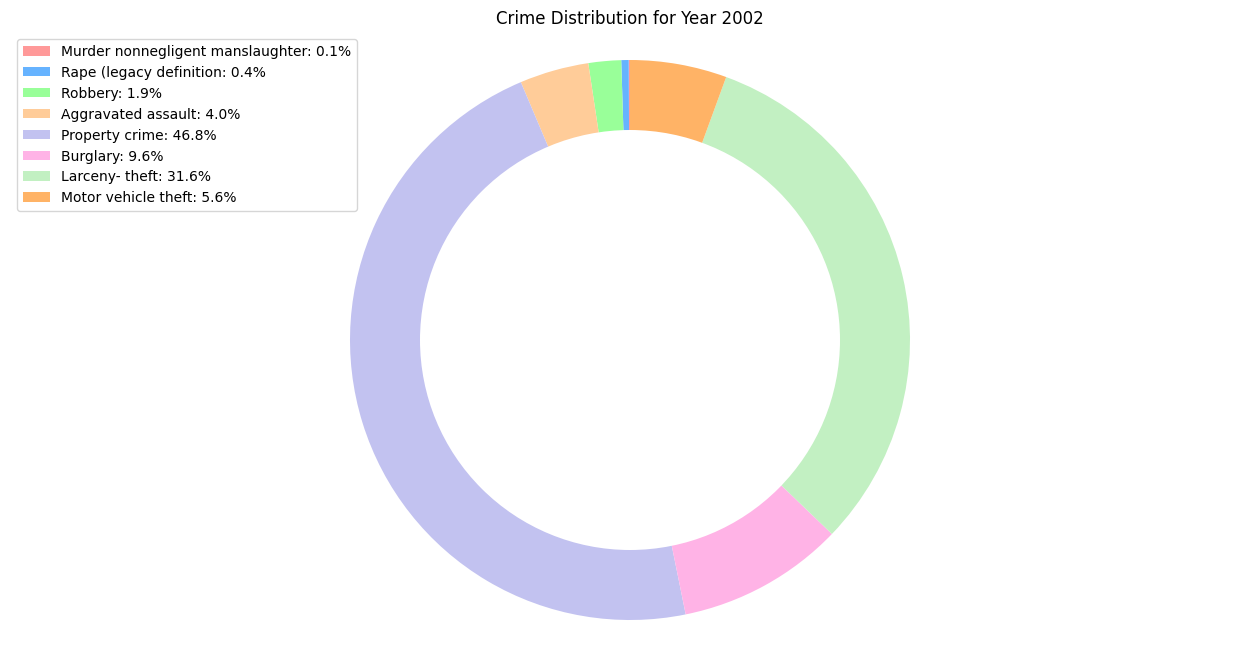

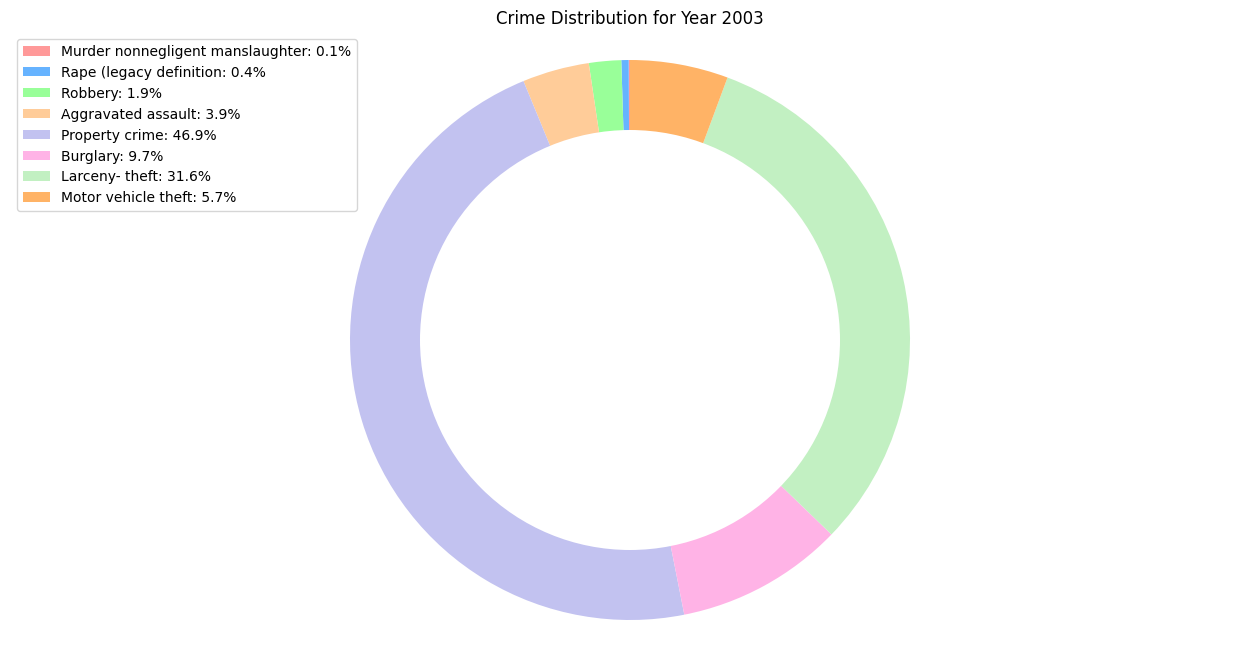

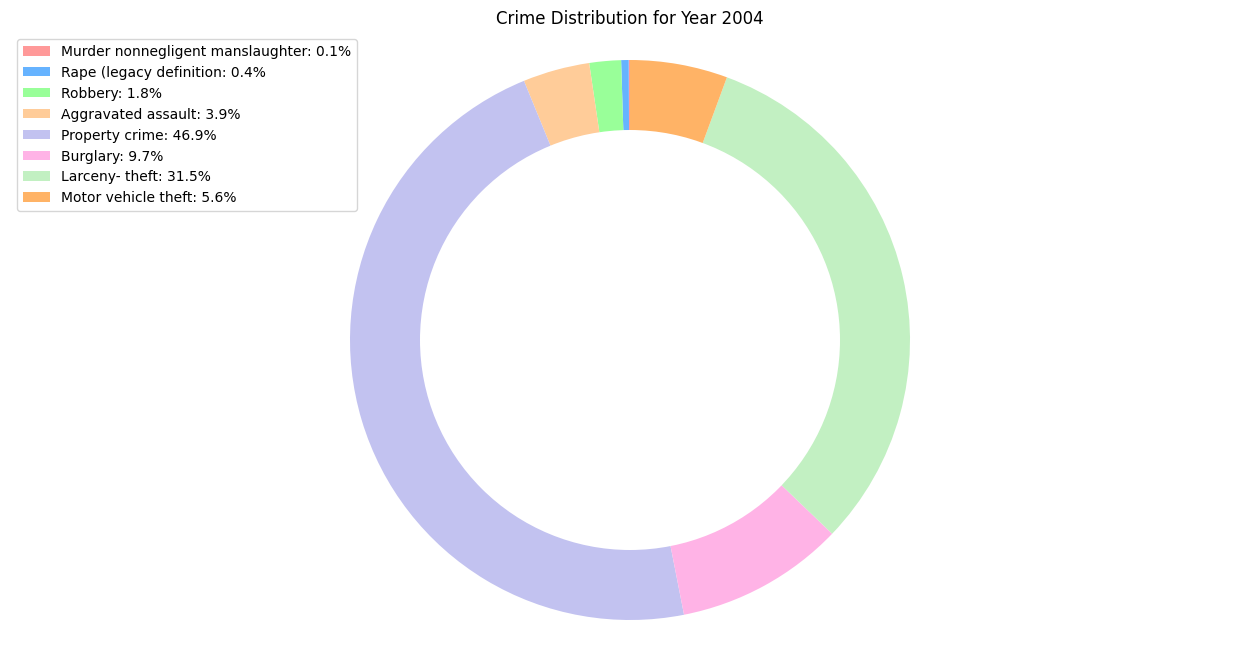

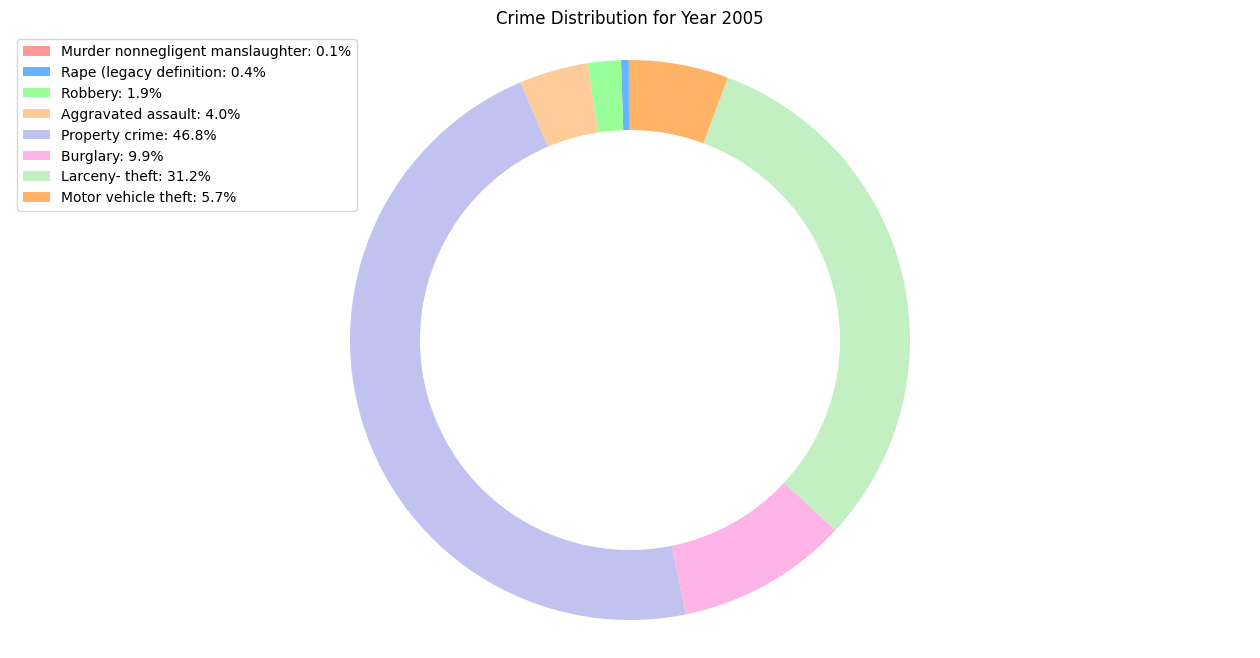

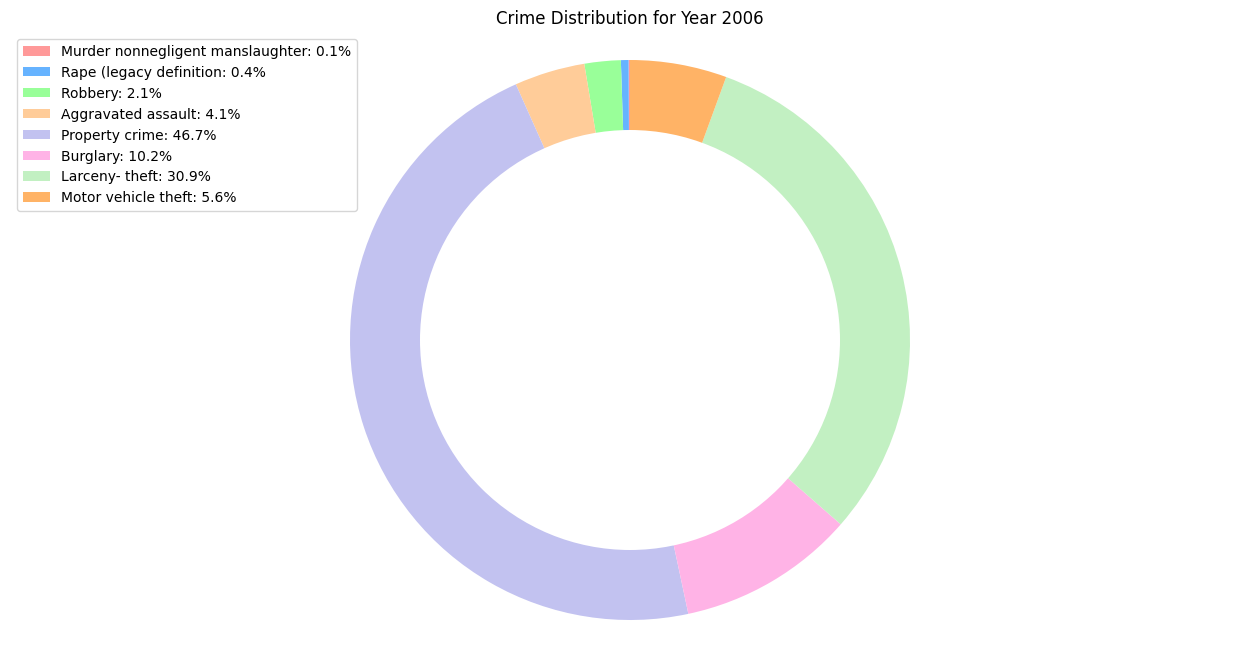

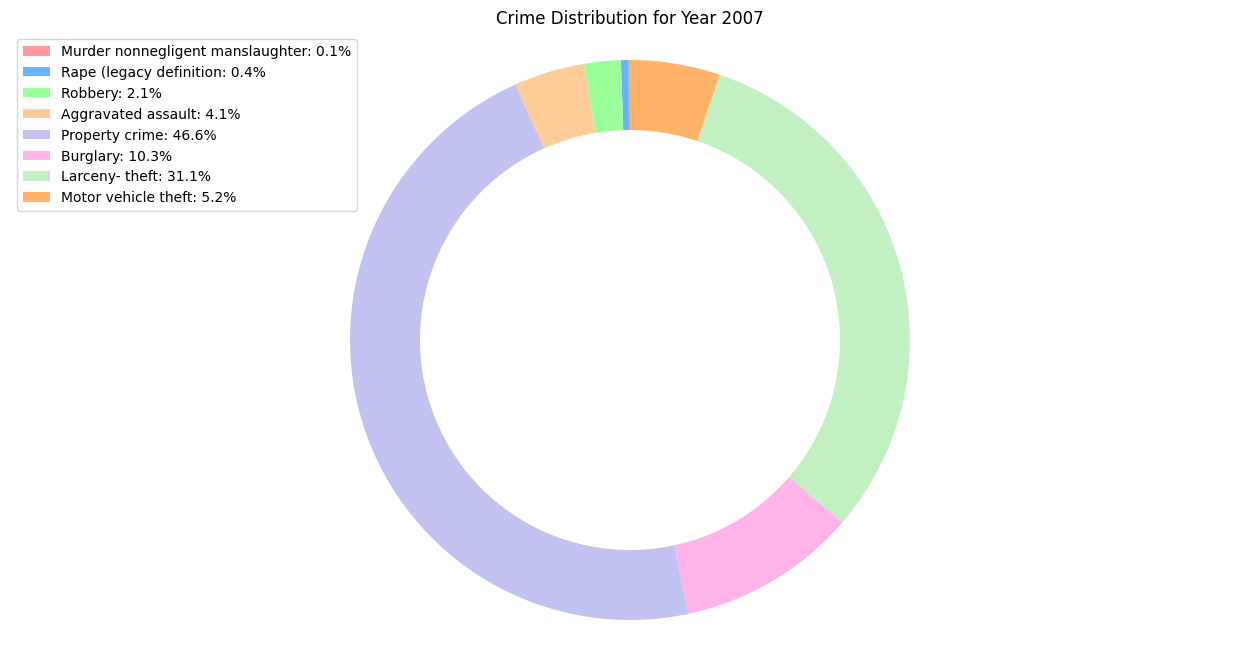

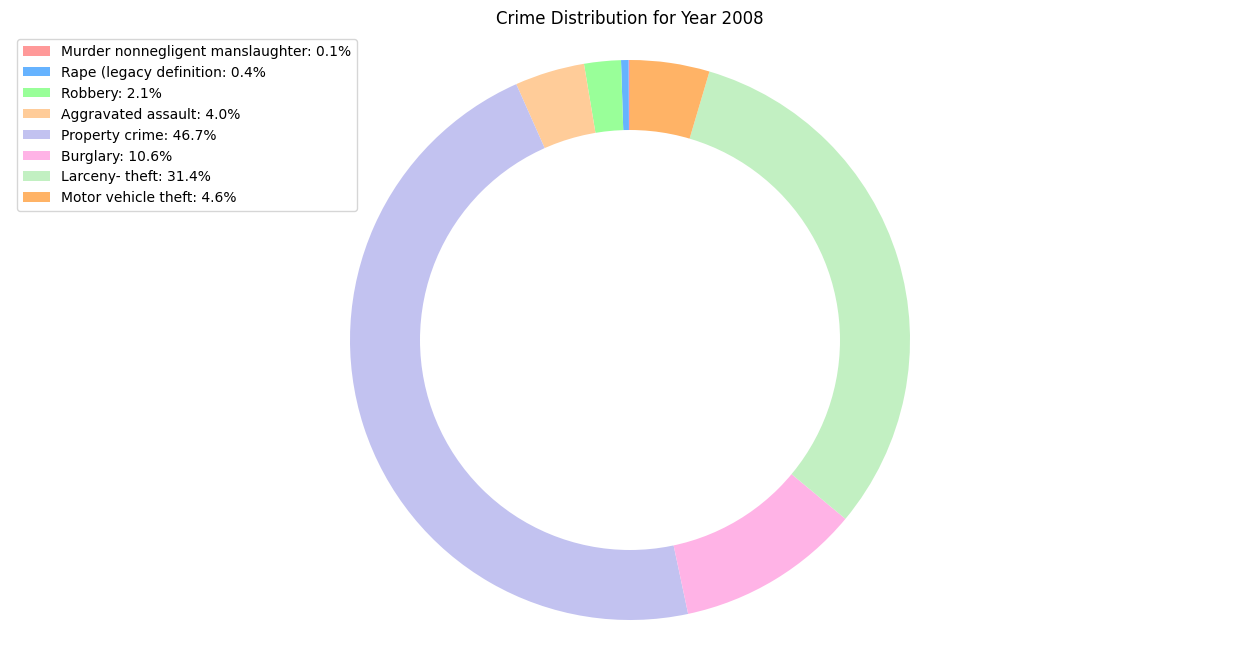

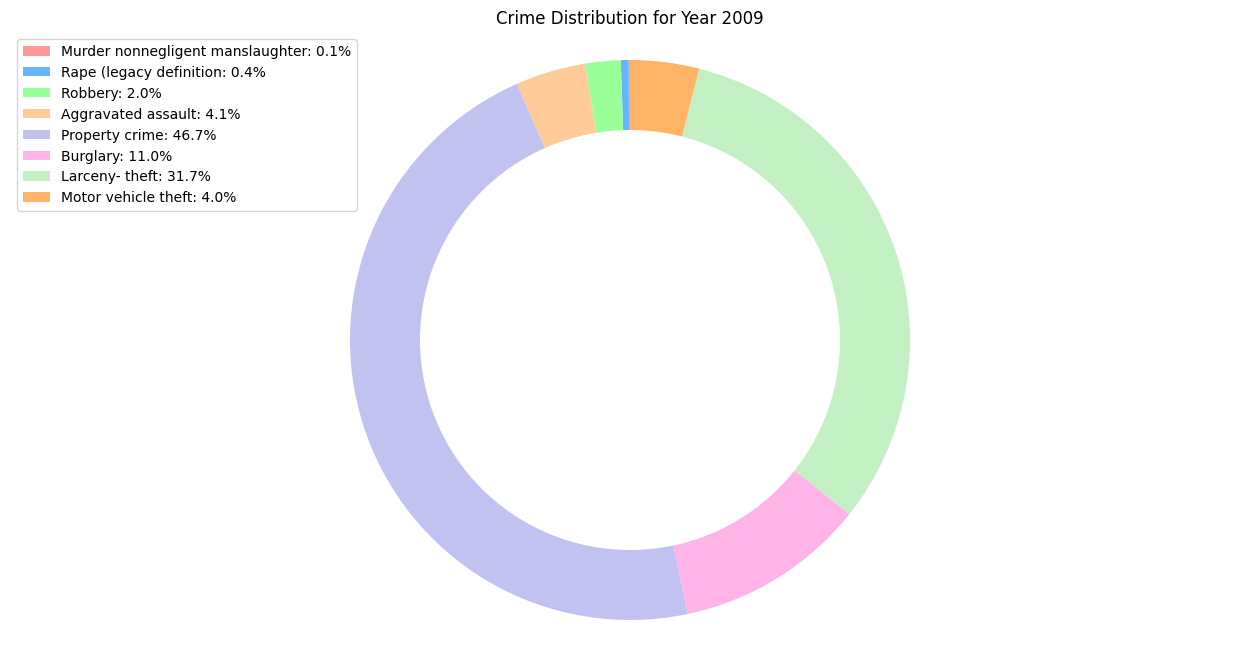

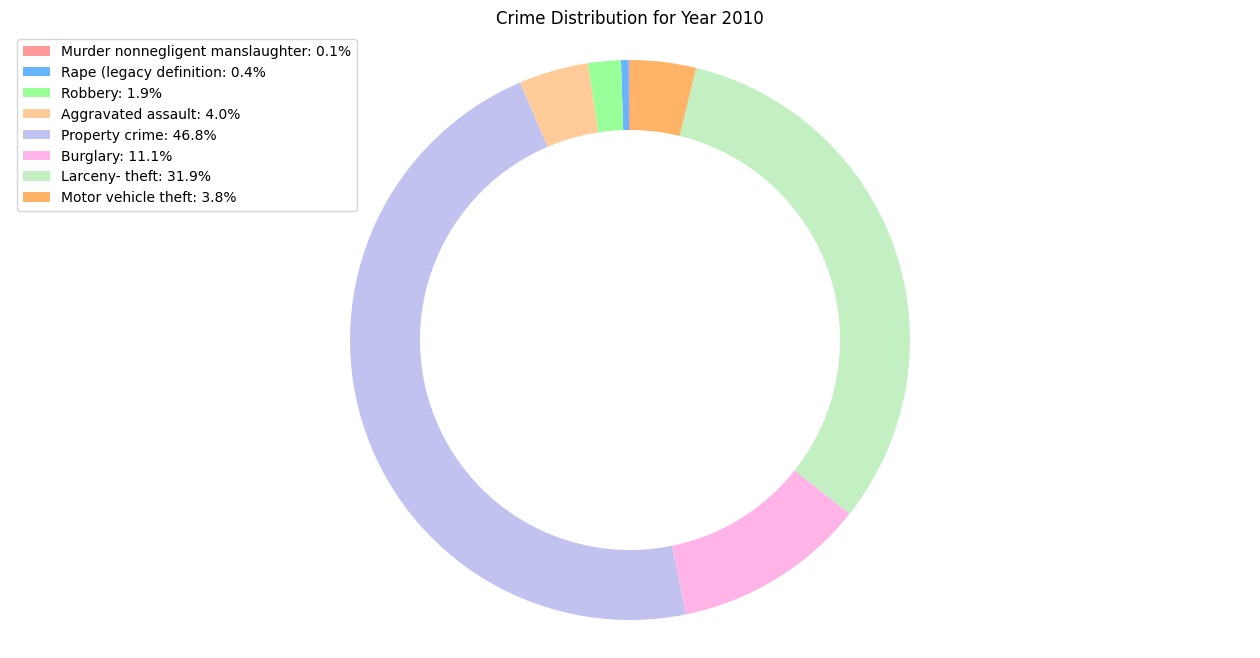

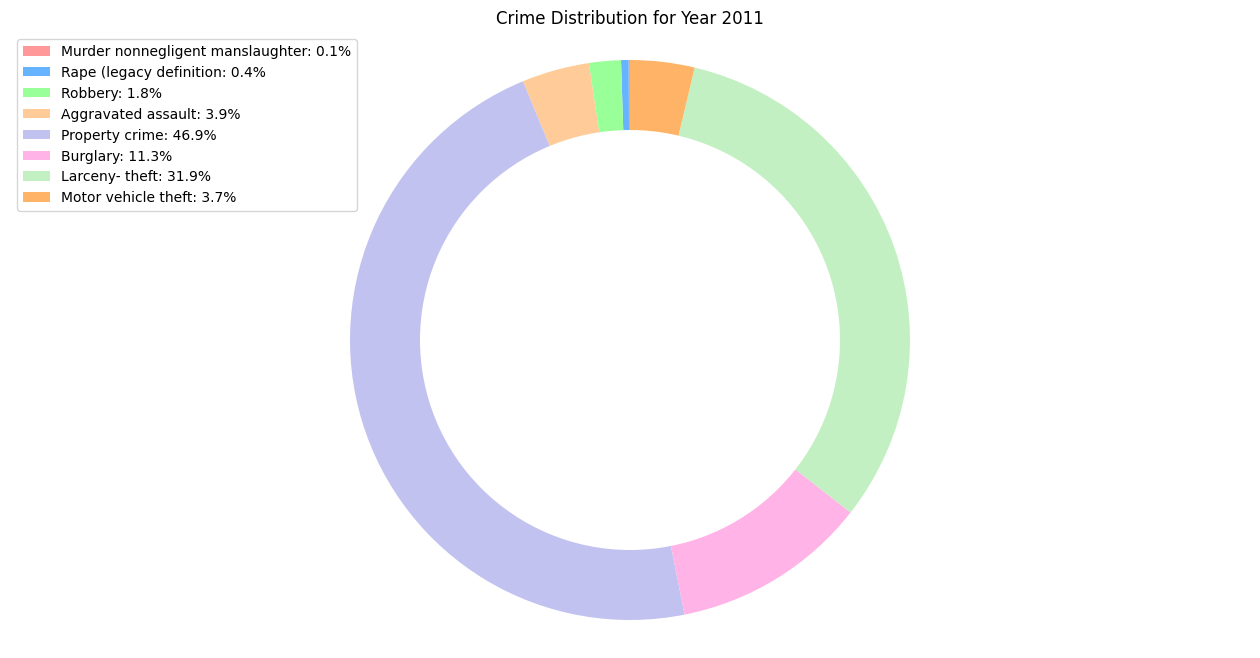

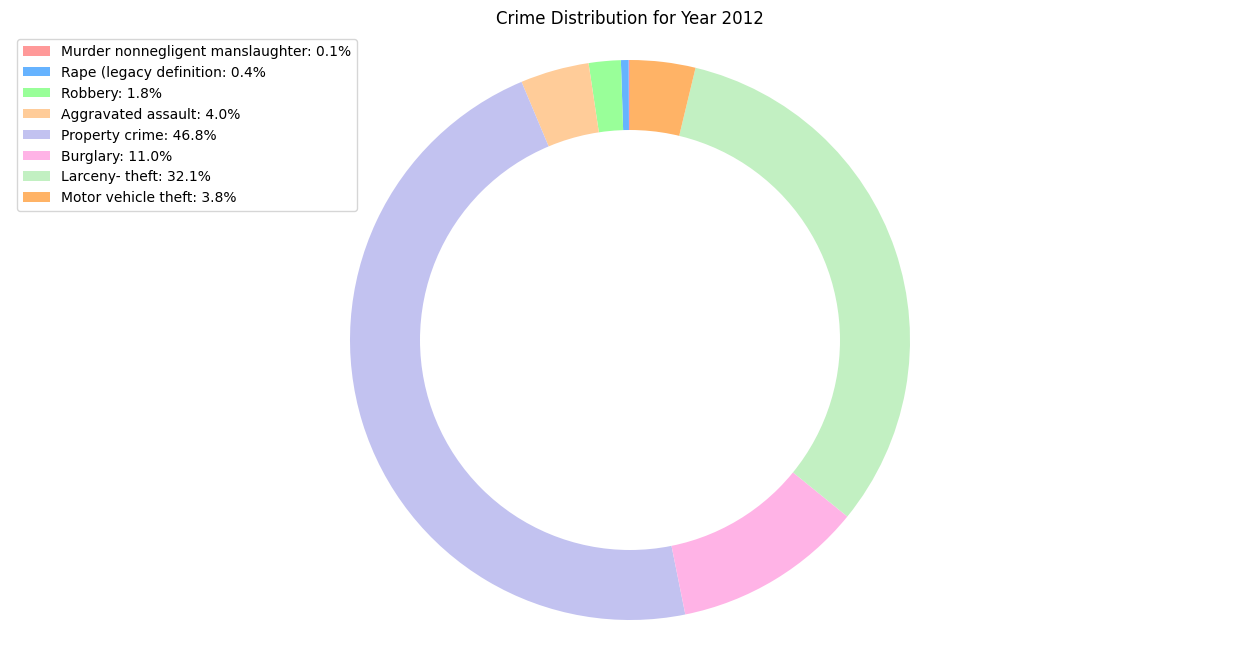

In [24]:
for year in df_before.Year:
    # Filter the dataset for the current year
    data_for_year = df_before[df_before['Year'] == year]

    # Calculate the total number of crimes for this year
    total_crimes = data_for_year[crime_categories_before].sum()

    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffb366']

    # Create the pie chart without labels
    fig, ax = plt.subplots(figsize=(16,8))
    wedges, autotexts = ax.pie(total_crimes, labels=None, shadow=False, startangle=90, colors=colors)
    ax.axis('equal')

    # Add a white circle in the center
    circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='white')
    plt.gca().add_artist(circle)

    # Create a custom legend with percentages beside each legend item
    custom_legend = [f'{crime}: {percentage:.1f}%' for crime, percentage in zip(crime_categories_before, total_crimes / total_crimes.sum() * 100)]

    # Add the legend
    plt.legend(custom_legend, loc='upper left')

    # Set the title and display the plot
    plt.title(f'Crime Distribution for Year {year}')
    plt.show()

##### **Proportion of crimes from 2013 to 2019**

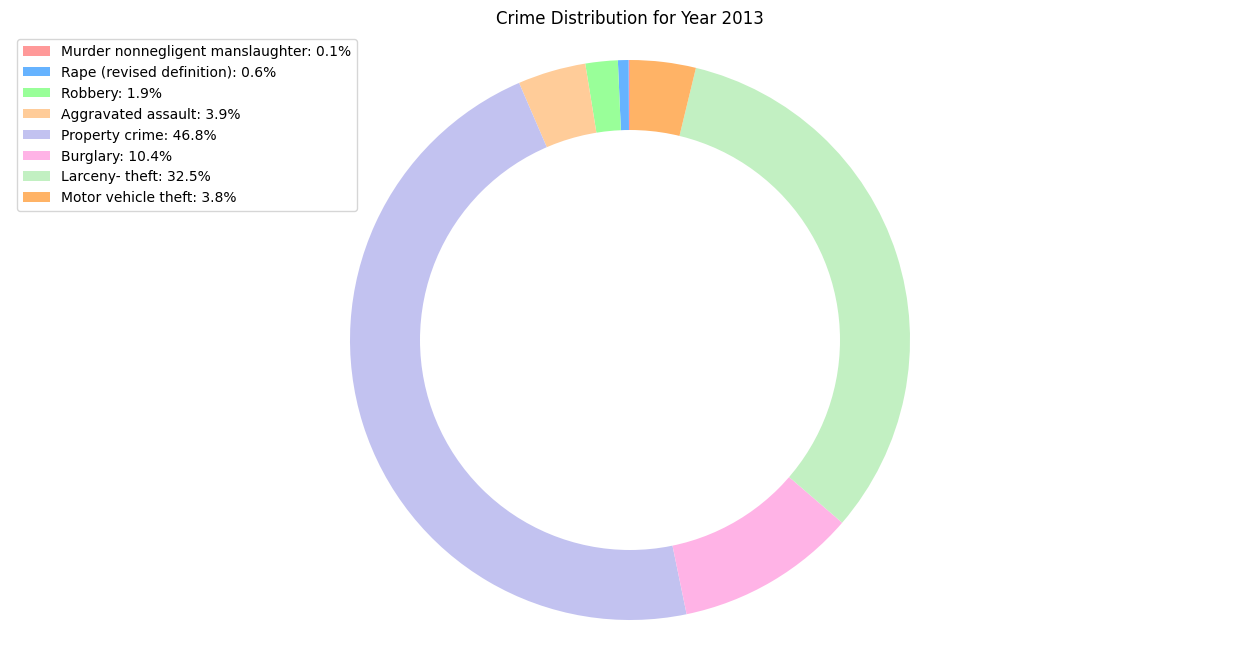

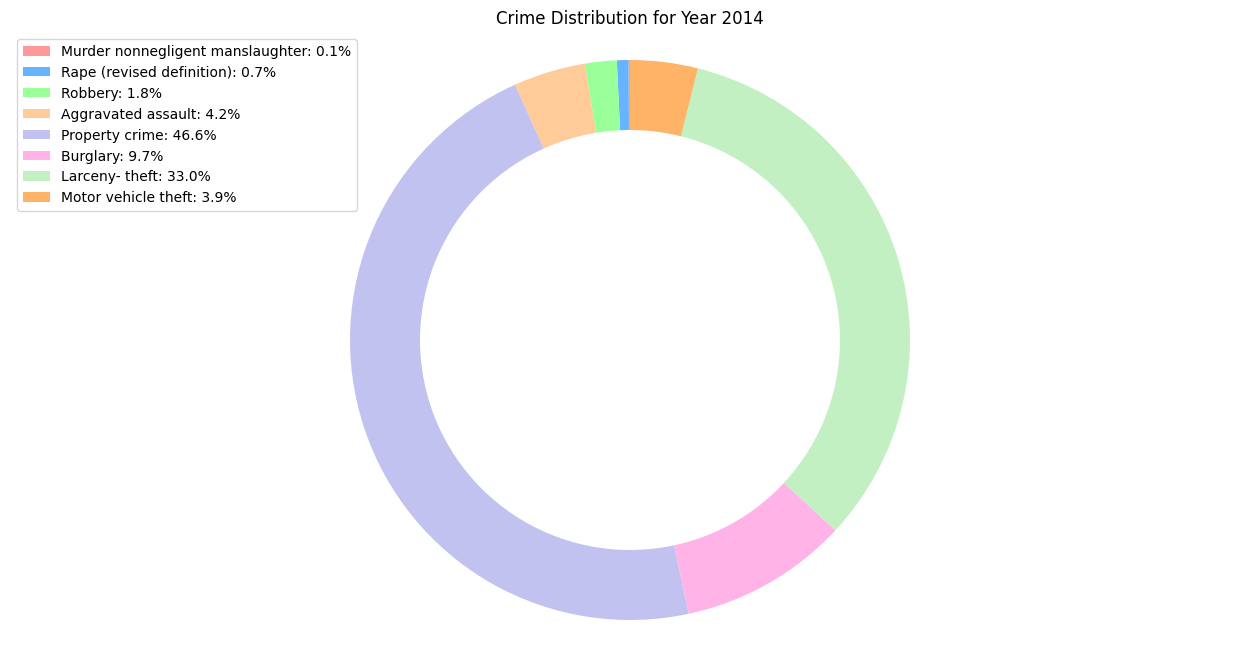

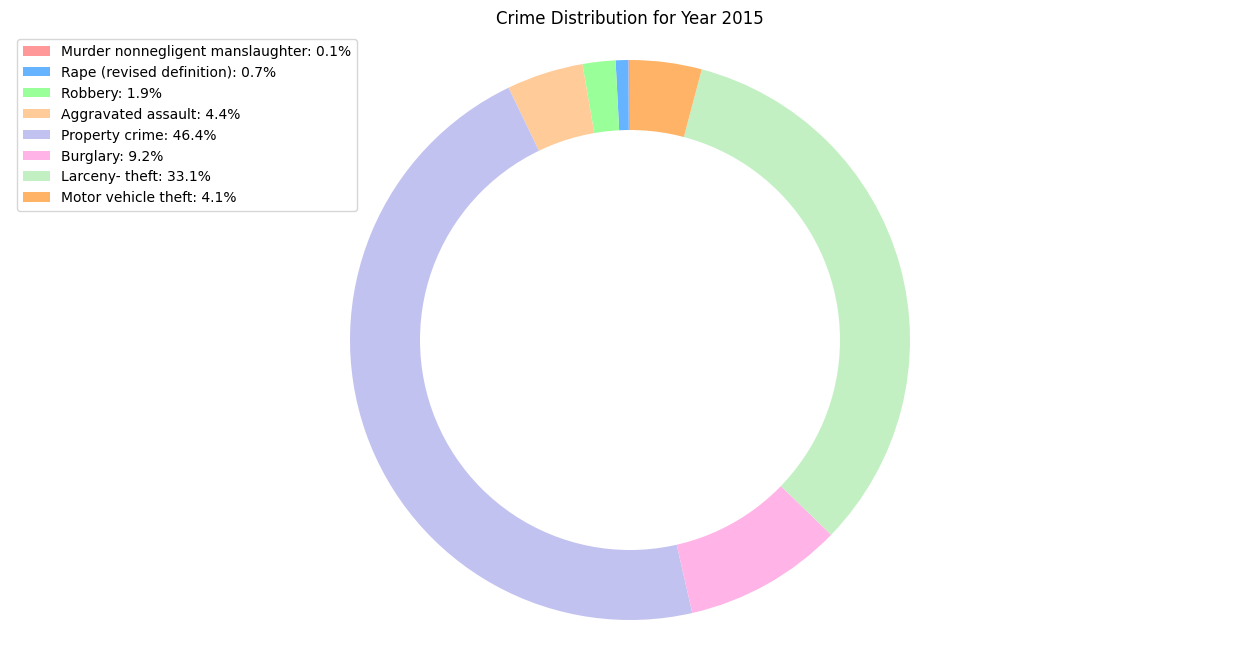

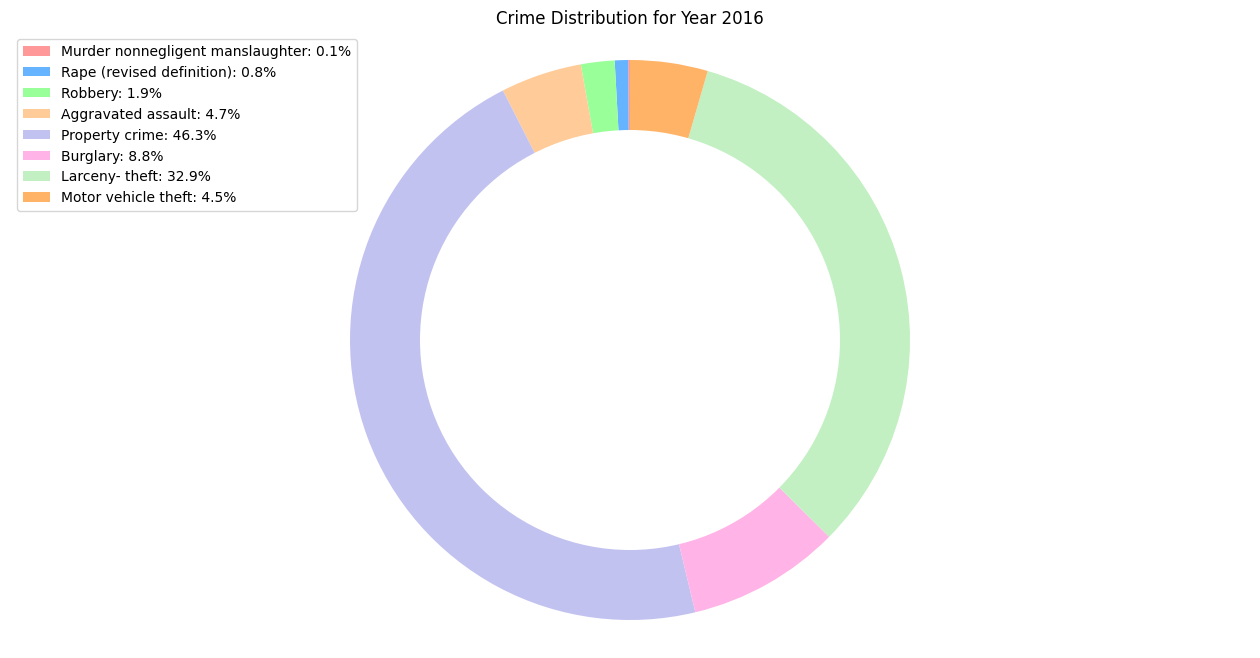

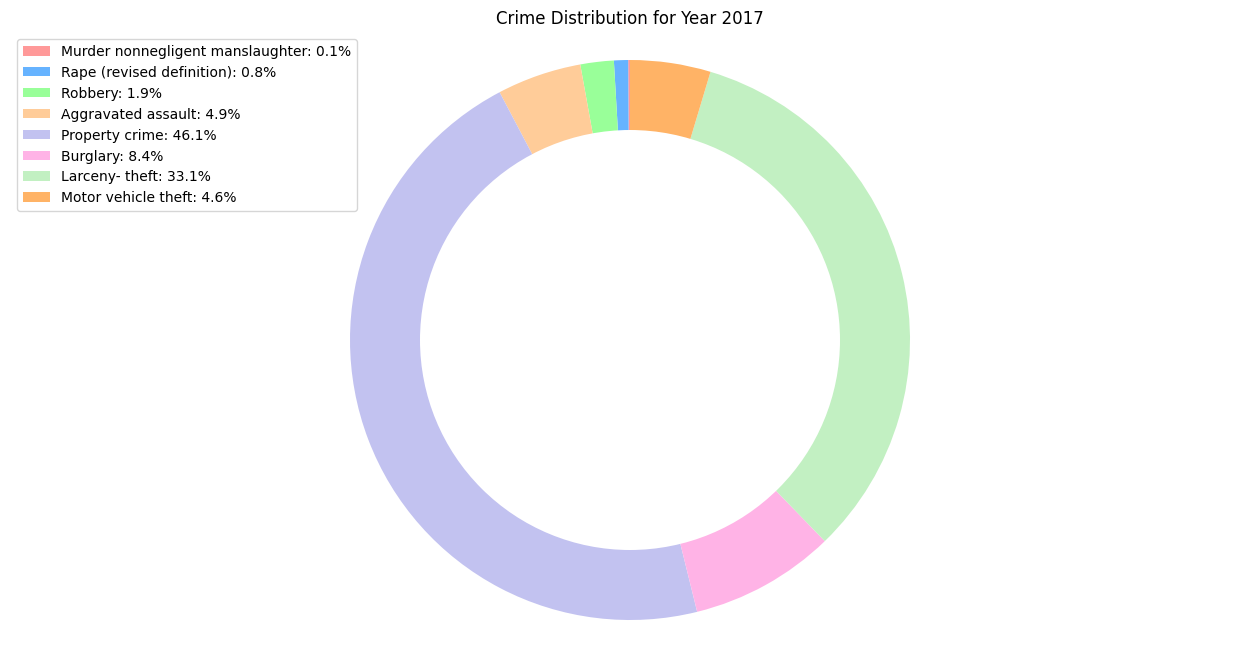

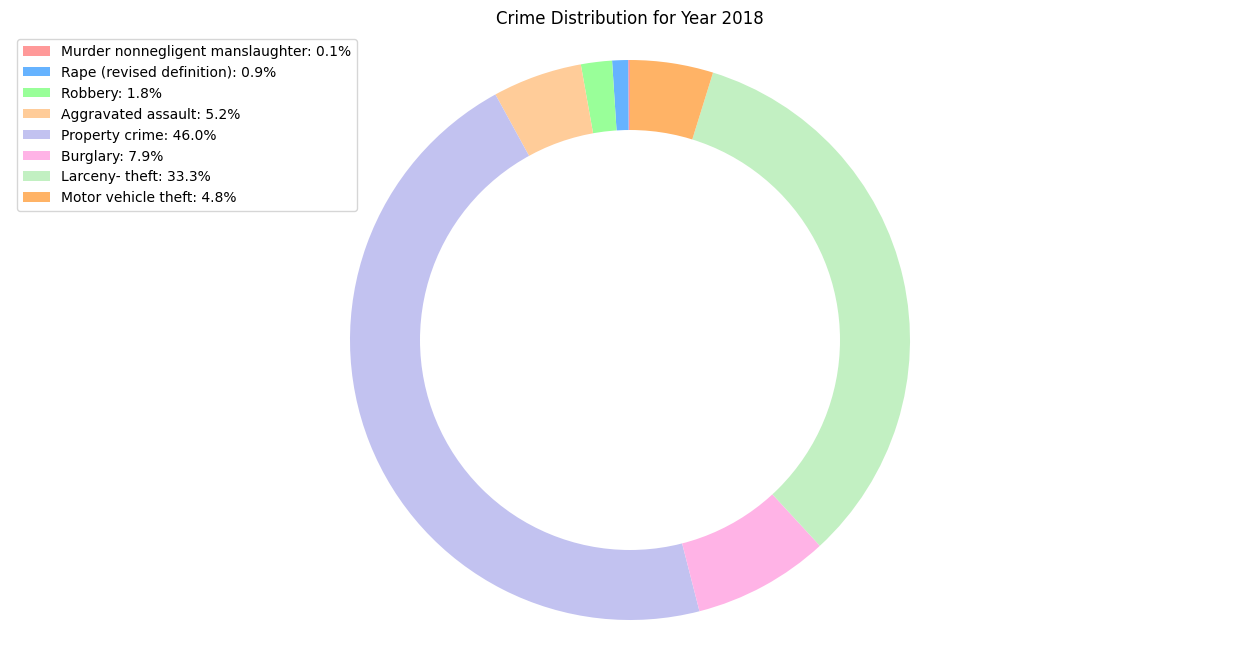

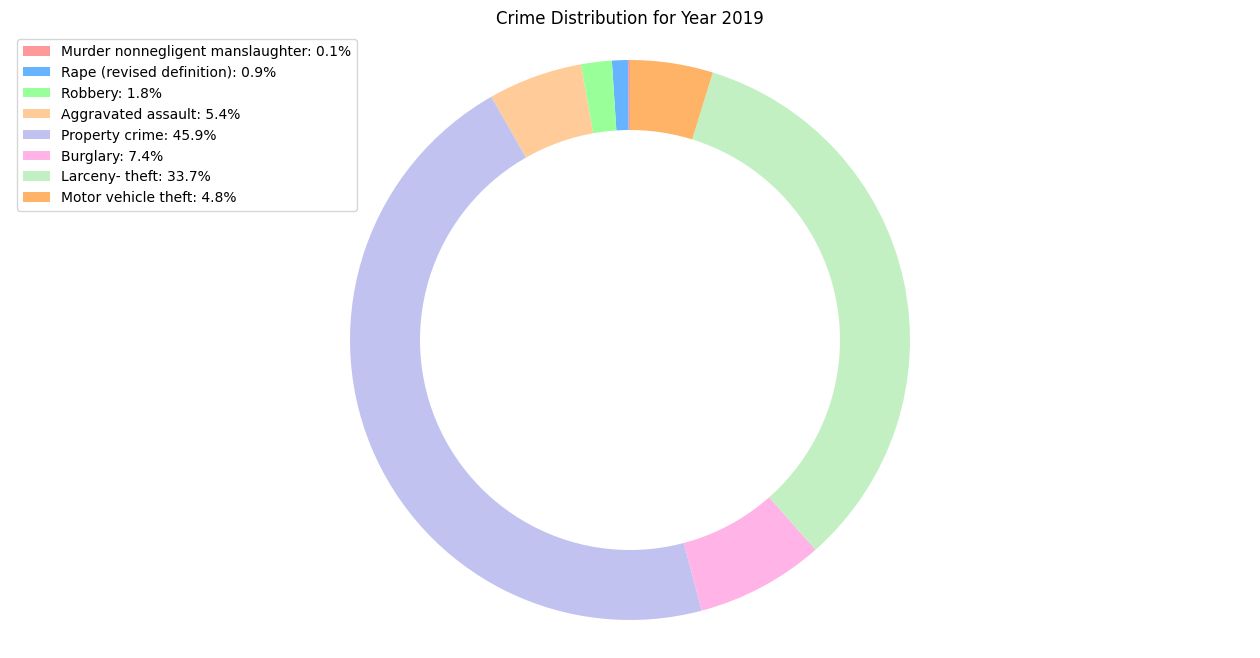

In [25]:
for year in df_after.Year:
    # Filter the dataset for the current year
    data_for_year = df_after[df_after['Year'] == year]

    # Calculate the total number of crimes for this year
    total_crimes = data_for_year[crime_categories_after].sum()

    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffb366']

    # Create the pie chart without labels
    fig, ax = plt.subplots(figsize=(16,8))
    wedges, autotexts = ax.pie(total_crimes, labels=None, shadow=False, startangle=90, colors=colors)
    ax.axis('equal')

    # Add a white circle in the center
    circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='white')
    plt.gca().add_artist(circle)

    # Create a custom legend with percentages beside each legend item
    custom_legend = [f'{crime}: {percentage:.1f}%' for crime, percentage in zip(crime_categories_after, total_crimes / total_crimes.sum() * 100)]

    # Add the legend
    plt.legend(custom_legend, loc='upper left')

    # Set the title and display the plot
    plt.title(f'Crime Distribution for Year {year}')
    plt.show()

Pie charts
* Pie charts are useful for providing a snapshot of the composition of a whole. Creating pie charts for crime rates in specific years can guide business decisions related to resource allocation, such as allocating more resources to address the most prevalent crime types.

* Researchers can use these charts to illustrate the prevalence of different crime categories in specific years, aiding in data interpretation.

#### C. Correlation between different crimes using heatmaps

##### **Correlation between crime rates and population**

In [26]:
crime_rate_categories = [
 'Population',
 'Violent crime rate',
 'Murder nonnegligent manslaughter rate',
 'Rape (legacy definition) rate',
 'Robbery rate',
 'Aggravated assault rate',
 'Property crime rate',
 'Burglary rate',
 'Larceny- theft rate',
 'Motor vehicle theft rate']

crime_rate_categories_after = [
 'Population',
 'Violent crime rate',
 'Murder nonnegligent manslaughter rate',
 'Rape (revised definition) rate',
 'Robbery rate',
 'Aggravated assault rate',
 'Property crime rate',
 'Burglary rate',
 'Larceny- theft rate',
 'Motor vehicle theft rate']

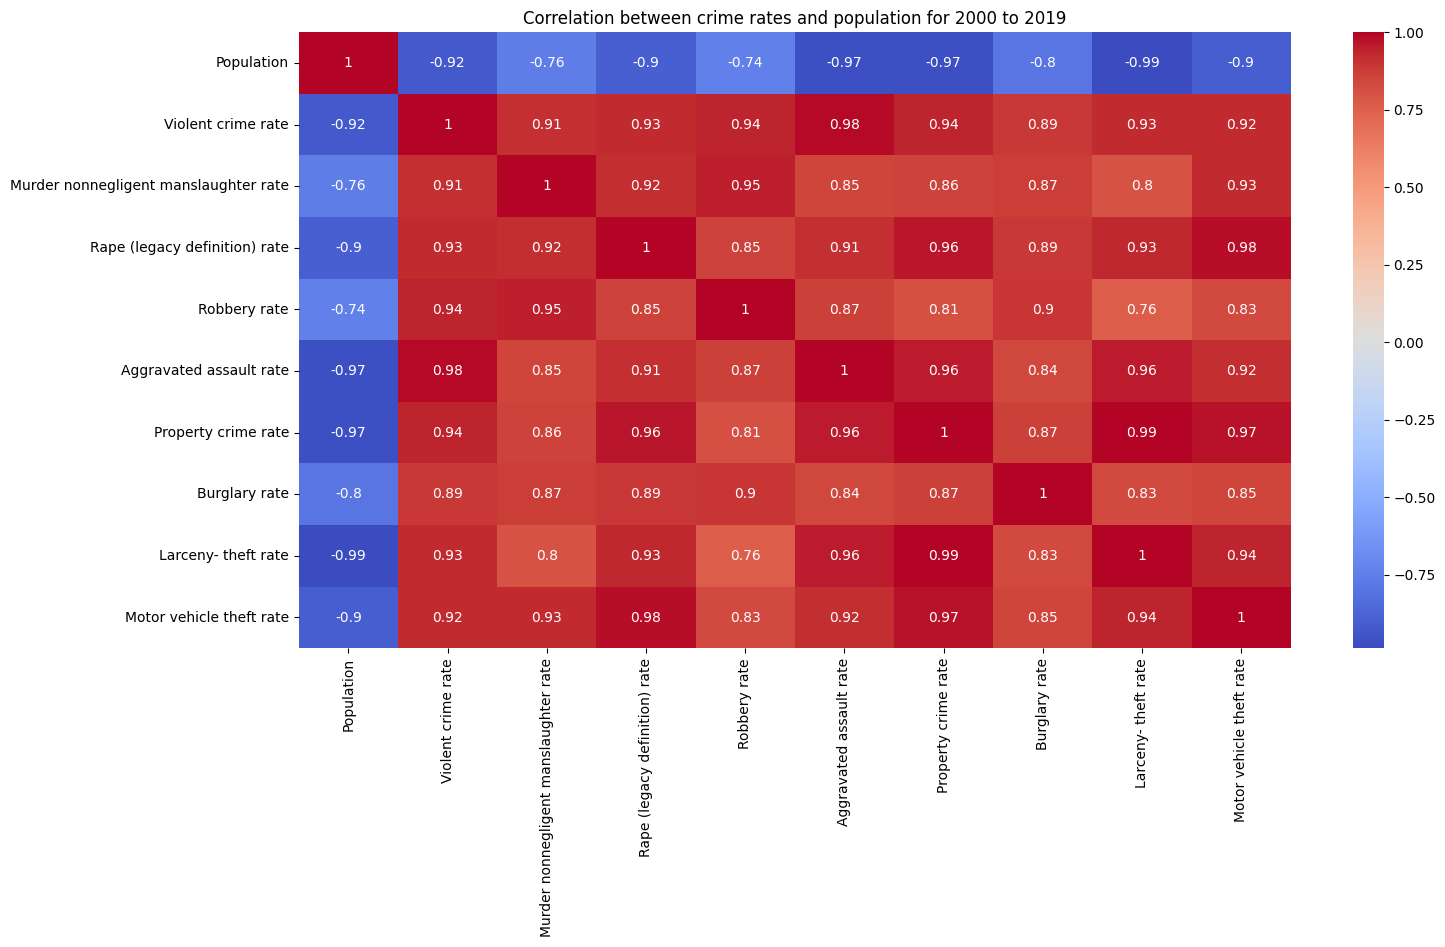

In [27]:
correlation_matrix = df_before[crime_rate_categories].corr()
plt.figure(figsize=(16,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation between crime rates and population for 2000 to 2019')
plt.show()

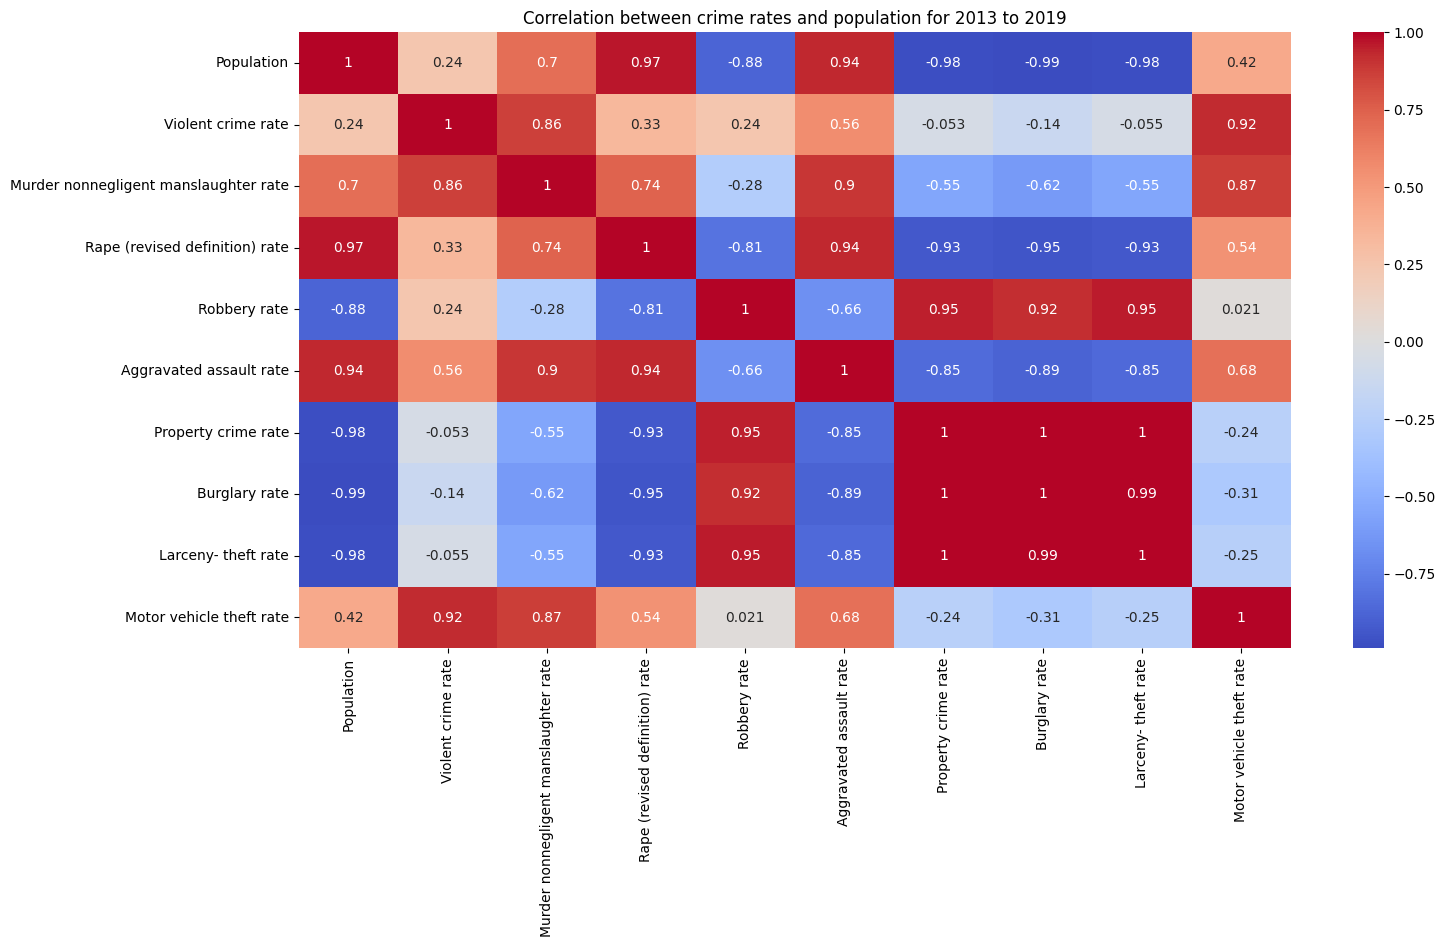

In [28]:
correlation_matrix = df_after[crime_rate_categories_after].corr()
plt.figure(figsize=(16,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation between crime rates and population for 2013 to 2019')
plt.show()

Heatmap:

Heatmaps can be used in business contexts to visualize correlations between variables. For example, the correlation between crime rates and population can help businesses understand whether there's a relationship between population size and crime.
Understanding the correlations between different types of crime rates can help with resource allocation. For example, there's a strong positive correlation between burglary and property crime. A business or law enforcement agency might allocate resources to target both issues simultaneously, as addressing one may impact the other.